In [1]:

#for colab


# # Install TensorFlow
# !pip install tensorflow

# # Install pandas
# !pip install pandas

# # Install matplotlib
# !pip install matplotlib


# # Install FastAPI
# !pip install fastapi

# # Install uvicorn
# !pip install uvicorn

# tf.version.VERSION

# from google.colab import drive
# drive.mount('/content/drive')

# !nvidia-smi

In [42]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import random
import pandas as pd

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [76]:
BATCH_SIZE = 32 # batch size of images
IMAGE_SIZE = 256 #individuak image is 256 x 256
CHANNELS = 3 #r,g, b channels
EPOCHS = 20 #trail and error to see epoch give better accuracy

(32, 256, 256, 3)
[0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1]


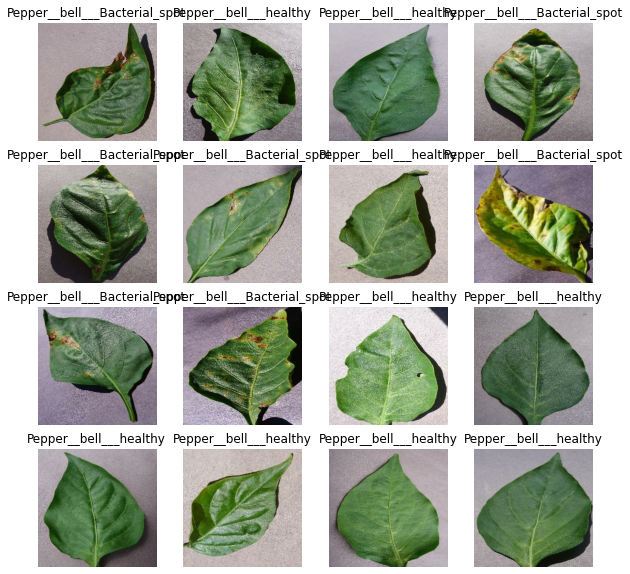

In [77]:
# dataset.take(1) returns batch size, image size, channels through first returned value
# dataset.take(1) returns labels of batch through second returned value
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    
    for i in range(16):
        ax = plt.subplot(4,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

**Creating a Layer for Resizing and Normalization**


Before using images as input for a machine learning model, it is often necessary to resize and normalize them. Resizing can be helpful if the model expects a certain size of input image, and normalization can improve model performance by scaling the pixel values to a specific range (such as between 0 and 1). These preprocessing steps can be added as a layer in the model, which means they will be applied both during training and when using the model for predictions. 

By adding a resize and normalization layer to the model, we can ensure that any images that are used as input will be automatically resized and normalized to the desired size and range, even if they are not in the correct size or format originally. This can be especially useful when using the model for predictions, as it allows us to easily process images of any size and format.

**Data Augmentation**

Data augmentation is a way to increase the size of a dataset by generating modified versions of the existing data. This can improve the accuracy of a machine learning model when we have a small dataset. Data augmentation is achieved by applying transformations to the data, such as rotating, flipping, cropping, or adding noise. By using data augmentation, we can often achieve better model performance with a small dataset.


In [44]:

#Training dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True
)

train_generator =train_datagen.flow_from_directory(
    '../dataset/train',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="sparse",
)

Found 1987 images belonging to 2 classes.


In [45]:
train_generator.class_indices

{'Pepper__bell___Bacterial_spot': 0, 'Pepper__bell___healthy': 1}

In [46]:
class_names = list(train_generator.class_indices.keys())
class_names

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']

In [36]:
#dir(train_generator) will show what else can this method give.

In [47]:
# Validation dataset
val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True
)

val_generator =val_datagen.flow_from_directory(
    '../dataset/val',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="sparse",
)

Found 247 images belonging to 2 classes.


In [48]:
# Test dataset
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True
)

test_generator =test_datagen.flow_from_directory(
    '../dataset/test',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="sparse",
)

Found 250 images belonging to 2 classes.


**Model Architecture**

In [52]:
#32 is decided after so train and error for optimal filters.
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
num_classes = 2
model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'), #number of nuerons is 64
    layers.Dense(num_classes, activation='softmax'), # normalizing the probability
])


In [53]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_67 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_67 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_68 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_68 (MaxPoolin  (None, 30, 30, 64)     

In [54]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [65]:
1987/32

62.09375

In [66]:
247/32

7.71875

In [70]:
history = model.fit(
    train_generator,
    steps_per_epoch=62,   
    batch_size=BATCH_SIZE,
    validation_data=val_generator,
    validation_steps=7,
    epochs=EPOCHS
)

Epoch 1/20
62/62 [==============================] - 78s 1s/step - loss: 0.5329 - accuracy: 0.7182 - val_loss: 0.1763 - val_accuracy: 0.9330
Epoch 2/20
62/62 [==============================] - 74s 1s/step - loss: 0.4263 - accuracy: 0.8629 - val_loss: 0.2523 - val_accuracy: 0.9107
Epoch 3/20
62/62 [==============================] - 72s 1s/step - loss: 0.1986 - accuracy: 0.9402 - val_loss: 0.0836 - val_accuracy: 0.9732
Epoch 4/20
62/62 [==============================] - 73s 1s/step - loss: 0.1300 - accuracy: 0.9601 - val_loss: 0.0332 - val_accuracy: 1.0000
Epoch 5/20
62/62 [==============================] - 72s 1s/step - loss: 0.0892 - accuracy: 0.9765 - val_loss: 0.0403 - val_accuracy: 0.9911
Epoch 6/20
62/62 [==============================] - 69s 1s/step - loss: 0.0576 - accuracy: 0.9872 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 7/20
62/62 [==============================] - 69s 1s/step - loss: 0.0435 - accuracy: 0.9908 - val_loss: 0.0943 - val_accuracy: 0.9509
Epoch 8/20
62/62 [==

**Plotting the Accuracy and Loss Curves**

In [79]:
scores = model.evaluate(test_generator)
scores

8/8 [==============================] - 5s 638ms/step - loss: 0.0146 - accuracy: 1.0000


[0.014615600928664207, 1.0]

In [80]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 62}

In [81]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [82]:
loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

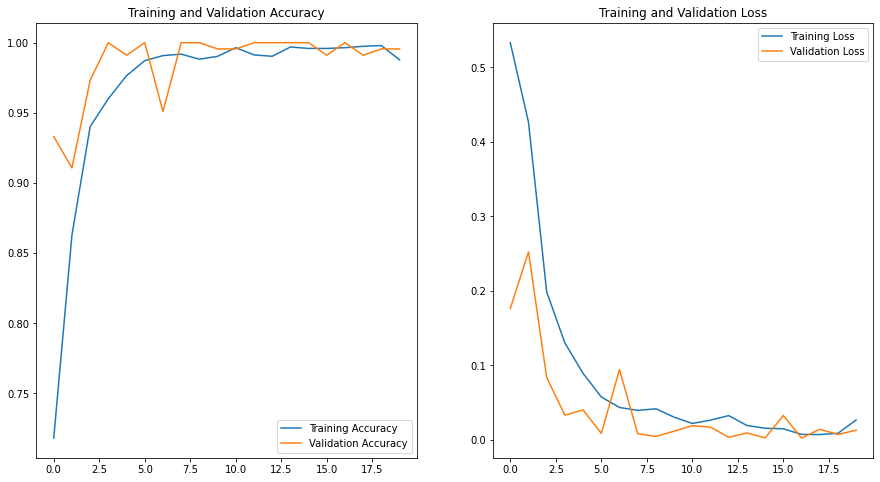

In [83]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), accuracy, label='Training Accuracy')
plt.plot(range(EPOCHS), val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Run prediction on a sample image**


In [94]:
# import numpy as np

# for images_batch, labels_batch in test_generator:
#   sample_image = images_batch[10].numpy().astype("uint8")


#   print("Sample image to predict")
#   plt.imshow(sample_image)
#   actual_label = labels_batch[10].numpy()

#   batch_prediction = model.predict(images_batch)
#   pred_label = np.argmax(batch_prediction[10])
  
#   if actual_label == 1:
#     print("Actual Label: Healthy")
#   if actual_label == 0:
#     print("Actual Label: Bacterial_spot")
  
#   if pred_label == 1:
#     print("Predicted Label: Healthy")
#   if pred_label == 0:
#     print("Predicted Label: Bacterial_spot")
  
#   # print(batch_prediction[10])


**Write a function for inference**


In [98]:
def predict(model, img):
  # converting images into array
  img_array = tf.keras.preprocessing.image.img_to_array(images[i])
  img_array = tf.expand_dims(img_array, 0)
  
  # making the prediction
  predictions = model.predict(img_array)
  predicted_class = class_names[np.argmax(predictions[0])]

  confidence = round(100 * (np.max(predictions[0])), 2)
  return predicted_class, confidence



**Testing inference on few sample images**

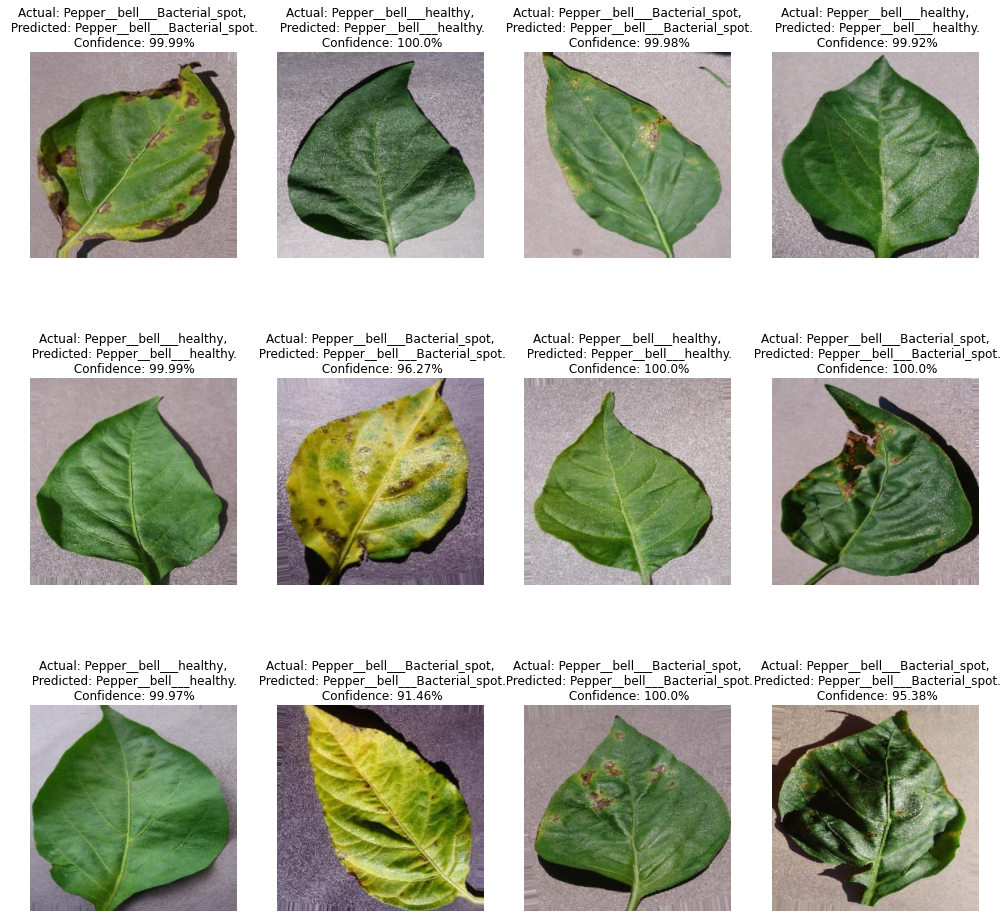

In [104]:
plt.figure(figsize=(17, 17))
for images, labels in test_generator:
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [89]:
import os

In [90]:
[i for i in (os.listdir("../idg_models") + [0])]
# int(float('5.0'))

[0]

In [ ]:
model.save("")

In [108]:
import os
model_version = max([int(i) for i in (os.listdir(pepper_models_path) + [0])])+1
model.save(f"{pepper_models_path}/peppermodel.h5")

In [107]:
# model_version =1
# model.save(f"{pepper_models_path}/{model_version}"